# **Introduction**

## What will you need?
1. Hugging Face Account and Authentication Token (Free)
2. Ngrok Account and Authentication Token (Free)
3. For Accessing the Llama Model, you will need a permission, since it is a gated model. Fill [this](https://llama.meta.com/llama-downloads/) form, and you should get the permission to access the model from Hugging Face within 1/2 hr. (Free)
4. A Dataset of what you want your model to learn.

    a. You can use Open source datasets
    
    b. Or Create your own! (Process mentioned below)

## **Installations**
Run **this** every time you restart your session

In [15]:
# Installation for QLORA
!pip install -q -U bitsandbytes
# !pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install transformers==4.31 #temporary fix required owing to breaking changes on Aug 9th 2023
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.2
    Uninstalling transformers-4.37.2:
      Successfully uninstalled transformers-4.37.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 

In [16]:
# Installation for Frontend and Langchain
!pip install langchain langchain_experimental openai --quiet # certain libraries require openai to be installed
!pip install chainlit langchain_community pyngrok --quiet
!pip install gradio --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.0/817.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.6/171.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [17]:
%pip install --upgrade --quiet  ctransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.8 MB/s eta 0:00:00


## **Creation of Dataset**


For finetuning, you require a dataset on which the model needs to be trained. For our usecase, we created our own dataset using the following steps.

1. Extraction of data (From websites, blogs, etc.)
2. Formatting Data in Google docs
3. Creating Question and Answer Pairs using that data (using ChatGPT manually)
4. Checking all question and answer pairs (Google Docs)
5. Writing Python script to convert the question and answer pairs into a jsonl file, which will be used for further finetuning

In [ ]:
import matplotlib.pyplot as plt
import json
import re
import pandas as pd

In [ ]:
def parse_qa_pairs(text):
    # Regular expressions to identify questions and answers - EDIT THIS ACCORDING TO YOUR TRAINING DATA FORMAT
    question_pattern = r"\*\*Question\*\*:\s*(.*?)\n"
    answer_pattern = r"\*\*Answer\*\*:\s*(.*?)\n"

    # Find all matches in the text
    questions = re.findall(question_pattern, text, re.DOTALL)
    answers = re.findall(answer_pattern, text, re.DOTALL)

    # Combine questions and answers into a list of dictionaries
    qa_pairs = [{"question": q, "answer": a} for q, a in zip(questions, answers)]

    return qa_pairs

# Read your text data from a file (replace 'your_file.txt' with your file path)
with open('/content/Training.txt', 'r') as file:
    text = file.read()

# Parse the question-answer pairs
qa_pairs = parse_qa_pairs(text)

# Convert to JSONL and write to a file
with open('output.jsonl', 'w') as file:
    for pair in qa_pairs:
        json_line = json.dumps(pair)
        file.write(json_line + "\n")

In [ ]:
data = pd.read_json("/content/output.jsonl", lines = True)
data

,question,answer
0,What does ESG stand for in the context of Mait...,"ESG stands for Environmental, Social, and Gove..."
1,What is Maitri Lab Grown Diamond's goal in ter...,Maitri Lab Grown Diamond aims to become a net-...
2,How does Maitri Lab Grown Diamond emphasize su...,Sustainability is at the core of Maitri Lab Gr...
3,What are the key priorities under Maitri Lab G...,The key priorities include environmental respo...
4,How does Maitri Lab Grown Diamond reduce its c...,Maitri Lab Grown Diamond reduces its carbon fo...
...,...,...
1015,What steps has Maitri Labgrown Diamonds taken ...,Maitri Labgrown Diamonds ensures ethical sourc...
1016,How does Maitri Labgrown Diamonds contribute t...,Maitri Labgrown Diamonds mitigates the environ...
1017,What role does the SCS-007 sustainability cert...,The SCS-007 sustainability certificate helps M...
1018,How does Maitri Labgrown Diamonds' commitment ...,Maitri Labgrown Diamonds' CSR commitment align...


In [ ]:
Q_len_list = []
for item in data['question']:
  Q_len_list.append(len(item.strip()))

A_len_list = []
for item in data['answer']:
  A_len_list.append(len(item.strip()))

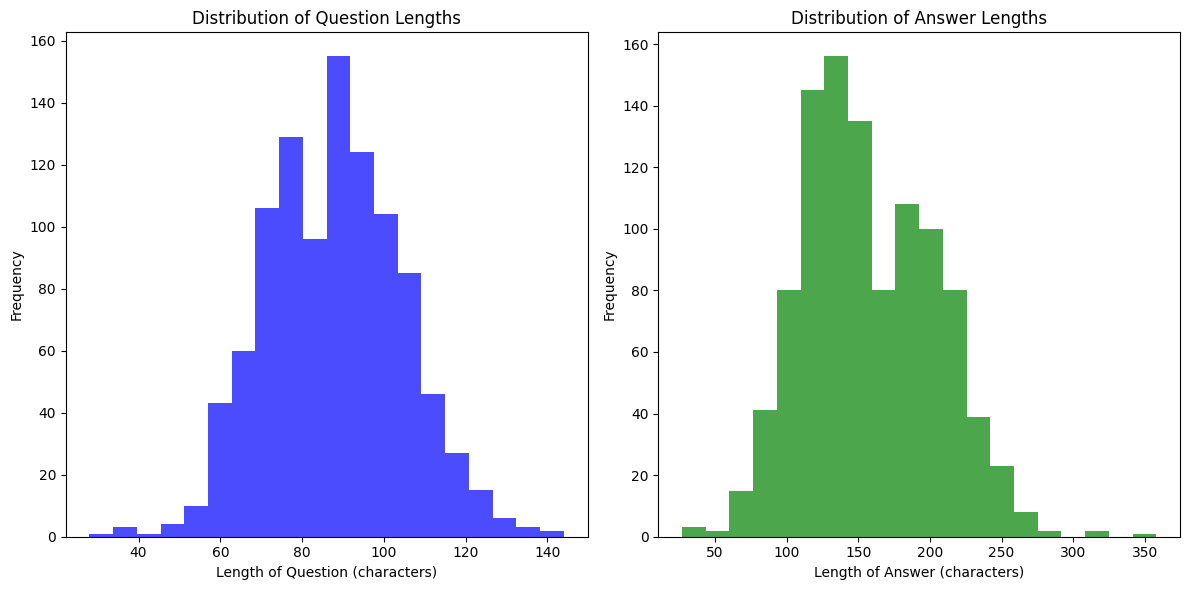

In [ ]:
# Calculate the length of each question and answer
question_lengths = Q_len_list
answer_lengths = A_len_list

# Plotting the distribution of question and answer lengths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(question_lengths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Question Lengths')
plt.xlabel('Length of Question (characters)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(answer_lengths, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Length of Answer (characters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## **Loading Llama 2**


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

In [ ]:
model_id = "meta-llama/Llama-2-7b-chat-hf"

In [ ]:
# Quantisation Config (explanation in next section)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# put your token in the output of the above cell

In [ ]:
# A tokenizer is in charge of preparing the inputs for a model
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Loading the actual model from Hugging Face
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map={"":0})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

## **Theoritical Understanding**
What is PEFT? What is LoRA? What is QLoRa?


### **Simplifying PEFT, LoRA, Quantization, and QLoRA**

Before we start with the code, its important to know what we are doing. Here is a simple explanation.



### **PEFT: Parameter-Efficient Fine-Tuning**
PEFT stands for Parameter-Efficient Fine-Tuning. It's a smart way to update large AI models for specific tasks without having to tweak every single part of the model. Imagine you have a giant robot that can do lots of things. Instead of rebuilding it to do a new task, you just upgrade a small part, making it learn new tricks faster and with less effort.

### **LoRA: Low-Rank Adaptation**
LoRA, or Low-Rank Adaptation, is a specific technique used in PEFT. It's like teaching the robot by only adjusting a couple of its wires or chips, rather than its whole circuitry. This method uses two smaller, simpler parts to make changes, keeping the rest of the robot as is. It's efficient because it doesn't require a lot of power or space to add these new skills.

### **Quantization**
Quantization is about making the robot's brain (the model) lighter so it can work on regular computers, not just super powerful ones. By reducing the complexity of the information it processes (like using simpler numbers), we can make the model run faster and use less memory. It's like teaching the robot to understand and respond using simpler words without losing its ability to complete tasks effectively.



### **QLoRA: Quantized LoRA**
QLoRA combines the ideas of LoRA and quantization. It's like upgrading the robot with those efficient chips (LoRA) but also making sure these chips can work with simpler instructions (quantization). This double strategy means our robot not only learns new tasks with just a small tweak but also becomes easier to use on everyday devices, like laptops or even phones, without needing a lot of power.

In essence, these technologies work together to make large AI models more accessible and efficient for everyone, allowing them to learn new tasks quickly without requiring huge amounts of computational resources.

For a more detailed understanding, you can read these articles:

 [PEFT and LORA](https://www.leewayhertz.com/parameter-efficient-fine-tuning/)


[QLORA](https://towardsdatascience.com/qlora-how-to-fine-tune-an-llm-on-a-single-gpu-4e44d6b5be32#:~:text=QLoRA%20(or%20Quantized%20Low%2DRank,the%20QLoRA%20paper%20%5B4%5D.)

## **Training Setup**

**Attribution**: This code is based on a fork of [bnb-4bit-training](https://colab.research.google.com/drive/1VoYNfYDKcKRQRor98Zbf2-9VQTtGJ24k?usp=sharing#scrollTo=E0Nl5mWL0k2T) and from [this Youtube Video](https://youtu.be/OQdp-OeG1as)

In [ ]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [ ]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [ ]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=8,
    lora_alpha=32,
    # target_modules=["query_key_value"],
    target_modules=["self_attn.q_proj", "self_attn.k_proj", "self_attn.v_proj", "self_attn.o_proj"], #specific to Llama models.
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 8388608 || all params: 3508801536 || trainable%: 0.23907331075678143


In [ ]:
from datasets import load_dataset

# Load your dataset directly - if not creating one
data = load_dataset('json', data_files = "/content/output.jsonl")

data = data.map(lambda samples: tokenizer(samples["question"]), batched=True)

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/1020 [00:00<?, ? examples/s]

## **Training**

In [ ]:
import transformers

In [ ]:
# needed for Llama tokenizer
tokenizer.pad_token = tokenizer.eos_token # </s>

In [ ]:
epochs = 10

In [ ]:
# You can play around and tune the hyperparameters for your use case

trainer = transformers.Trainer(
    model=model,
    train_dataset=data["train"],
    args=transformers.TrainingArguments(
        per_device_train_batch_size=1,
        gradient_accumulation_steps=4,
        warmup_steps=2,
        max_steps=epochs,
        learning_rate=2e-4,
        fp16=True,
        logging_steps=1,
        output_dir="outputs",
        optim="paged_adamw_8bit"
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)
model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()

You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss
1,2.900800
2,3.217800
3,3.323200
4,2.920900
5,3.546500
6,3.367800
7,3.116800
8,3.420700
9,2.796700
10,2.927300


TrainOutput(global_step=10, training_loss=3.1538442373275757, metrics={'train_runtime': 54.0764, 'train_samples_per_second': 0.74, 'train_steps_per_second': 0.185, 'total_flos': 17489883537408.0, 'train_loss': 3.1538442373275757, 'epoch': 0.04})

## **Inference**

In [ ]:
from transformers import TextStreamer
model.config.use_cache = True
model.eval()

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(32000, 4096, padding_idx=0)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=8, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=8, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k_proj): lora.Linear4bit(
                (base_layer)

***`Pro-tip`*** *: Create a an awesome system prompt using ChatGPT*

In [ ]:
sys_prompt = '''As a chatbot for Maitri Lab Grown Diamonds, your primary focus is to
provide accurate and helpful information about lab grown diamonds and the diamond industry.
Engage in discussions related to diamonds, including sourcing, types, and care, as well as
information specific to Maitri Lab Grown Diamonds. When asked about unrelated topics,
politely redirect the conversation to your areas of expertise or inform the user that
the topic falls outside your scope. Maintain a professional and neutral tone, respecting
all viewpoints and ensuring accuracy in your responses.'''

***`Prompt Template for Llama 2`***


In [ ]:
'''

<s>                             --- this indicates the start of the prompt

[INST]                          --- this indicates the system + user prompt

<<SYS>>                         --- this indicates the system of the prompt

{your_system_message}

<</SYS>>                        --- this indicates the end of system prompt

{user_message_1 (question)}

[/INST]                         --- this indicates the end of system + user prompt (model will now answer)

'''

'\n\n<s>                             --- this indicates the start of the prompt\n\n[INST]                          --- this indicates the system + user prompt\n\n<<SYS>>                         --- this indicates the system of the prompt\n\n{your_system_message}\n\n<</SYS>>                        --- this indicates the end of system prompt\n\n{user_message_1 (question)}\n\n[/INST]                         --- this indicates the end of system + user prompt (model will now answer)\n\n'

***`Hyperparameters for Large Language Models`***

When generating text with Large Language Models (LLMs), several parameters help control how the text is created. Let's break down what each of these parameters means in simple terms:

 **`max_new_tokens=512`**

This parameter sets the maximum number of new words or tokens the model can generate in a single request. Think of it as telling a storyteller, "You can add up to 512 more words to this story." It helps limit the length of the output to make sure the story doesn't go on forever.

 **`top_k=40`**

`top_k` limits the model's choices to the top 40 most likely next words at each step of the generation process. It's like giving a painter only the 40 best colors to choose from for the next stroke, ensuring the quality of choices remains high.

 **`top_p=0.6`**

This parameter, also known as "nucleus sampling," ensures that the model only considers the next words that cumulatively make up 60% of the probability of what comes next. It's akin to narrowing down choices to those that are most likely to make sense, based on what's already been said or written.

 **`temperature=0.2`**

The temperature controls the randomness of the output. A low temperature (0.2) means the model will be more confident and less random in its choices, producing more predictable and conservative text. It's like telling a story with a clear path in mind, rather than taking unexpected turns.

 **`length_penalty=1`**

This parameter penalizes longer outputs to encourage more concise and relevant responses. A penalty of 1 means there's no extra penalty for longer text, maintaining a neutral stance towards the length of the generated content. It ensures the model doesn't favor short or long outputs too much but strikes a balance.

In essence, these parameters help fine-tune the storytelling or text generation capabilities of LLMs, allowing users to control the creativity, relevance, and length of the output.


In [ ]:
# Define a stream *without* function calling capabilities
def stream(user_prompt):
    runtimeFlag = "cuda:0"
    system_prompt = sys_prompt

    B_INST, E_INST = "[INST]", "[/INST]"
    B_SYS, E_SYS = "<<SYS>>\n", "\n<</SYS>>\n\n"

    prompt = f"{B_INST} {B_SYS}{system_prompt.strip()}{E_SYS}{user_prompt.strip()} {E_INST}\n\n"

    inputs = tokenizer([prompt], return_tensors="pt").to(runtimeFlag)

    streamer = TextStreamer(tokenizer, skip_prompt = 'True')

    # Despite returning the usual output, the streamer will also print the generated text to stdout.
    outputs = model.generate(**inputs,
                       streamer=streamer,
                       max_new_tokens=512,
                       top_k = 40,
                       top_p = 0.6,
                       temperature=0.2,
                       length_penalty=1,
                       return_dict_in_generate = True,
    )

    generated_text = tokenizer.decode(outputs['sequences'][0], skip_special_tokens=True)
    return generated_text

In [ ]:
# Your Model is ready! Try prompting it...

output = stream('What are Maitri Lab grown diamonds?')

Hello! As a chatbot for Maitri Lab Grown Diamonds, I'm happy to help you learn more about our unique and sustainable diamond products. Maitri Lab Grown Diamonds are created through a revolutionary process that replicates the natural process of diamond formation, but in a controlled and sustainable environment. This means that our diamonds are grown without the need for mining, which can have negative environmental impacts.

Our lab grown diamonds are made using advanced technology that recreates the high-pressure and high-temperature conditions found deep within the Earth's crust. This process allows us to create diamonds that are chemically, optically, and structurally identical to natural diamonds, but with a much lower environmental impact.

At Maitri Lab Grown Diamonds, we're committed to providing our customers with the highest quality diamonds that are not only beautiful but also sustainable. We believe that everyone deserves to own a diamond that is not only stunning but also et

In [ ]:
print(output)

[INST] <<SYS>>
As a chatbot for Maitri Lab Grown Diamonds, your primary focus is to
provide accurate and helpful information about lab grown diamonds and the diamond industry.
Engage in discussions related to diamonds, including sourcing, types, and care, as well as
information specific to Maitri Lab Grown Diamonds. When asked about unrelated topics,
politely redirect the conversation to your areas of expertise or inform the user that
the topic falls outside your scope. Maintain a professional and neutral tone, respecting
all viewpoints and ensuring accuracy in your responses.
<</SYS>>

What are Maitri Lab grown diamonds? [/INST]

Hello! As a chatbot for Maitri Lab Grown Diamonds, I'm happy to help you learn more about our unique and sustainable diamond products. Maitri Lab Grown Diamonds are created through a revolutionary process that replicates the natural process of diamond formation, but in a controlled and sustainable environment. This means that our diamonds are grown without th

In [ ]:
output1 = stream('Why CVD diamonds dont have any resale value?')

Thank you for reaching out with your question! I'm happy to help you understand the resale value of CVD diamonds.

It's important to note that CVD diamonds, also known as lab-grown diamonds, are a relatively new and emerging market. As such, the resale value of CVD diamonds may not be as established or well-defined as that of traditional mined diamonds.

There are a few factors that may contribute to the lower resale value of CVD diamonds:

1. Lack of brand recognition: CVD diamonds are still a relatively new and niche market, and some consumers may be unfamiliar with the technology and benefits of lab-grown diamonds. As a result, the resale value of CVD diamonds may be lower due to a lack of brand recognition and trust.
2. Limited market demand: The demand for CVD diamonds is still growing, but it may not be as high as that of traditional mined diamonds. This can lead to a lower resale value for CVD diamonds.
3. Difficulty in verifying authenticity: Some consumers may be hesitant to p

In [ ]:
output2 = stream("Does CVD diamond have any impact (negative) on skin?")

Thank you for reaching out with your question! As a chatbot for Maitri Lab Grown Diamonds, I'm here to provide you with accurate and helpful information about lab-grown diamonds and the diamond industry.

To answer your question, CVD (Chemical Vapor Deposition) diamonds, which are also known as lab-grown diamonds, do not have any negative impact on skin. In fact, CVD diamonds are made from the same carbon as natural diamonds, and they are chemically and physically identical to natural diamonds.

CVD diamonds are created through a process where a diamond seed is placed in a vacuum chamber and exposed to a stream of carbon-containing gases. The gases are heated and deposited onto the diamond seed, creating a diamond crystal structure. This process allows for the growth of diamonds with the same crystal structure and properties as natural diamonds, but without the environmental and social impact of traditional diamond mining.

In terms of skin care, CVD diamonds are non-toxic and hypoalle

In [ ]:
output3 = stream("What products do Maitri Diamonds have?")

Thank you for reaching out to me! As a chatbot for Maitri Lab Grown Diamonds, I'm happy to provide you with information about our products. Maitri Lab Grown Diamonds offers a wide range of high-quality lab-grown diamonds in various shapes, sizes, and colors. Here are some of the products we have:

1. Round Brilliant Lab Grown Diamonds: These are the most popular and versatile lab-grown diamonds, available in a range of carat weights and colors.
2. Cushion Cut Lab Grown Diamonds: These diamonds have a softer, more rounded shape and are available in a variety of colors.
3. Pear Shaped Lab Grown Diamonds: These diamonds have a unique shape and are available in a range of colors.
4. Heart Shaped Lab Grown Diamonds: These diamonds are perfect for romantic jewelry, such as necklaces, bracelets, and rings.
5. Marquise Cut Lab Grown Diamonds: These diamonds have a pointed shape and are available in a range of colors.
6. Oval Cut Lab Grown Diamonds: These diamonds have a longer, narrower shape 

***`NOTE:`***


 Try asking something from your training data


 If it does not answer, maybe you can do the following:

 - Increase the size of Training Data

 - Better the quality of the Training data

 - Increasing the number of epochs in training

 - Hyperparameter Tuning

## **Save the Model to Drive**

In [ ]:
# Only for colab users.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_save_path = '/content/drive/MyDrive/SavedModels/Llama7b_finetuned_{}_epochs'.format(epochs)
tokenizer_save_path = '/content/drive/MyDrive/SavedModels/Tokeniser_Llama7b_finetuned_{}_epochs'.format(epochs)

# Save the model
model.save_pretrained(model_save_path)

# Save the tokenizer
tokenizer.save_pretrained(tokenizer_save_path)

('/content/drive/MyDrive/SavedModels/Tokeniser_Llama7b_finetuned_10_epochs/tokenizer_config.json',
 '/content/drive/MyDrive/SavedModels/Tokeniser_Llama7b_finetuned_10_epochs/special_tokens_map.json',
 '/content/drive/MyDrive/SavedModels/Tokeniser_Llama7b_finetuned_10_epochs/tokenizer.model',
 '/content/drive/MyDrive/SavedModels/Tokeniser_Llama7b_finetuned_10_epochs/added_tokens.json',
 '/content/drive/MyDrive/SavedModels/Tokeniser_Llama7b_finetuned_10_epochs/tokenizer.json')


## **Push the model to Hugging Face Hub**

In [ ]:
# Change your username
HUGGING_FACE_USERNAME = 'dev02chandan'

In [ ]:
# Extract the last portion of the base_model
base_model_name = model_id.split("/")[-1]

# Define the save and push paths
adapter_model = f"{HUGGING_FACE_USERNAME}/{base_model_name}-fine-tuned-adapters"
new_model = f"{HUGGING_FACE_USERNAME}/{base_model_name}-fine-tuned"

In [ ]:
# Save the model
model.save_pretrained(adapter_model, push_to_hub=True, use_auth_token=True)

# Push the model to the hub
model.push_to_hub(adapter_model, use_auth_token=True)

adapter_model.bin:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/dev02chandan/Llama-2-7b-chat-hf-fine-tuned-adapters/commit/168070f95e4532a725ad453a96f4ea1302c46186', commit_message='Upload model', commit_description='', oid='168070f95e4532a725ad453a96f4ea1302c46186', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
# reload the base model (you might need a pro subscription for this because you may need a high RAM environment for the 13B model since this is loading the full original model, not quantized)
model = AutoModelForCausalLM.from_pretrained(model_id, device_map='cpu', trust_remote_code=True, torch_dtype=torch.float16)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
from peft import PeftModel

# load perf model with new adapters
model = PeftModel.from_pretrained(
    model,
    adapter_model,
)

In [ ]:
model = model.merge_and_unload() # merge adapters with the base model.

In [ ]:
model.push_to_hub(new_model, use_auth_token=True, safe_serialization=True, max_shard_size="5GB")

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/dev02chandan/Llama-2-7b-chat-hf-fine-tuned/commit/7845b8a152e5ff9f5f7996340ce10033515a0e51', commit_message='Upload LlamaForCausalLM', commit_description='', oid='7845b8a152e5ff9f5f7996340ce10033515a0e51', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
tokenizer.push_to_hub(new_model, use_auth_token=True)

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/dev02chandan/Llama-2-7b-chat-hf-fine-tuned/commit/ae074d7957b532786dec6a9a908c9991916c1d46', commit_message='Upload tokenizer', commit_description='', oid='ae074d7957b532786dec6a9a908c9991916c1d46', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
new_model

'dev02chandan/Llama-2-7b-chat-hf-fine-tuned'

## **Inference from Hugging Face**

Your Colab could crash here, if you are trying to load the model twice.

If your model is already loaded, you can move ahead.

Use this code instead of running all the above steps next time! (after installation)

**Let's try to see if we can reload the model directly from Hugging Face now**

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

model_id = f"{HUGGING_FACE_USERNAME}/Llama-2-7b-chat-hf-fine-tuned"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map={"":0})

tokenizer_config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/630 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.59G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/183 [00:00<?, ?B/s]

In [ ]:
# Minor changes to stream function

def stream(user_prompt):
    runtimeFlag = "cuda:0"
    system_prompt = sys_prompt

    B_INST, E_INST = "[INST]", "[/INST]"
    B_SYS, E_SYS = "<<SYS>>\n", "\n<</SYS>>\n\n"

    prompt = f"{B_INST} {B_SYS}{system_prompt.strip()}{E_SYS}{user_prompt.strip()} {E_INST}\n\n"

    inputs = tokenizer([prompt], return_tensors="pt").to(runtimeFlag)

    streamer = TextStreamer(tokenizer, skip_prompt = 'True')

    # Despite returning the usual output, the streamer will also print the generated text to stdout.
    # this prints the output
    outputs = model.generate(**inputs,
                       streamer=streamer,
                       max_new_tokens=512,
                       top_k = 40,
                       top_p = 0.6,
                       temperature=0.2,
                       length_penalty=1,
                       return_dict_in_generate = True,
    )


    generated_text = tokenizer.decode(outputs['sequences'][0], skip_special_tokens=True)

    # If you don't want to output your system prompt - and only want the answer from the llm

    end_marker = "[/INST]"
    end_index = generated_text.find(end_marker)

    if end_index != -1:  # -1 means the substring wasn't found
        cropped_text = generated_text[end_index + len(end_marker):]
    else:
        cropped_text = generated_text


    return cropped_text



In [ ]:
user_prompt = "Tell me about your company!"
answer = stream(user_prompt)

Thank you for reaching out! I'm happy to provide information about Maitri Lab Grown Diamonds.

Maitri Lab Grown Diamonds is a leading diamond company that specializes in creating high-quality, ethically-sourced lab-grown diamonds. Our mission is to provide customers with a more sustainable and ethical alternative to traditional mined diamonds, while still offering the same level of quality and craftsmanship.

At Maitri, we believe that diamonds should be accessible to everyone, regardless of their budget or personal values. That's why we've developed a proprietary process that allows us to create lab-grown diamonds with the same brilliance and fire as mined diamonds, but at a fraction of the cost.

Our team of experts works tirelessly to ensure that every diamond we create meets the highest standards of quality and craftsmanship. We also prioritize sustainability and ethical sourcing, using only conflict-free diamonds and recycled materials whenever possible.

Whether you're looking fo

In [ ]:
answer

"\n\nThank you for reaching out! I'm happy to provide information about Maitri Lab Grown Diamonds.\n\nMaitri Lab Grown Diamonds is a leading diamond company that specializes in creating high-quality, ethically-sourced lab-grown diamonds. Our mission is to provide customers with a more sustainable and ethical alternative to traditional mined diamonds, while still offering the same level of quality and craftsmanship.\n\nAt Maitri, we believe that diamonds should be accessible to everyone, regardless of their budget or personal values. That's why we've developed a proprietary process that allows us to create lab-grown diamonds with the same brilliance and fire as mined diamonds, but at a fraction of the cost.\n\nOur team of experts works tirelessly to ensure that every diamond we create meets the highest standards of quality and craftsmanship. We also prioritize sustainability and ethical sourcing, using only conflict-free diamonds and recycled materials whenever possible.\n\nWhether you'

## **Gradio**

**Gradio** is an open-source Python package that allows you to quickly build a demo or web application for your machine learning model, API, or any arbitrary Python function. You can then share a link to your demo or web application in just a few seconds using Gradio's built-in sharing features.

In [ ]:
import gradio as gr

iface = gr.Interface(fn=stream, inputs="text", outputs="text")
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://af73c30d3915ec202e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


You can even deploy this model directly, to hugging face spaces.

## **Converting this model to GGUF Format**


**If you are using Free colab - this will crash, if you have ran all previous cells. This is because this section involvs cloning a huge repository from Github, which takes up allot of the 78.2GB free disk space available**

 ***`IMP`***

**Going Ahead - You can delete and disconnect runtime. Start a new runtime with GPU if your model is saved to Hugging face. The code ahead will help you reload the model and move on.**

GGUF is a new binary file format introduced in August 2023, designed for AI models like LLaMA and Llama-2. It aims to make AI model handling more efficient by providing:

- **Fast Loading**: Quickly loads models for immediate use.
- **Flexibility**: Supports special tokens, metadata, and future extensibility without breaking compatibility.
- **Single-File Convenience**: Packages entire models into one file, simplifying distribution and usage.

This format is particularly useful for AI applications requiring efficient model loading and flexibility, such as those developed in PyTorch for inference with systems like llama.cpp. With its key-value structure for storing information, GGUF is more adaptable and easier to use compared to previous formats like GGML and GGJT.

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# Make sure you have git-lfs installed (https://git-lfs.com)
!git lfs install

# Clone llama.cpp's repository. They provide code to convert models into gguf.
!git clone https://github.com/ggerganov/llama.cpp.git

Git LFS initialized.
Cloning into 'llama.cpp'...
remote: Enumerating objects: 19426, done.
remote: Counting objects: 100% (5974/5974), done.
remote: Compressing objects: 100% (277/277), done.
remote: Total 19426 (delta 5845), reused 5711 (delta 5696), pack-reused 13452
Receiving objects: 100% (19426/19426), 22.51 MiB | 21.34 MiB/s, done.
Resolving deltas: 100% (13660/13660), done.


In [ ]:
# Clone your model from Huggingface again.
# Change the username to yours here.

!git clone https://huggingface.co/dev02chandan/Llama-2-7b-chat-hf-fine-tuned

Cloning into 'Llama-2-7b-chat-hf-fine-tuned'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 1), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (17/17), 482.26 KiB | 5.74 MiB/s, done.
Filtering content: 100% (4/4), 4.55 GiB | 11.75 MiB/s, done.
Encountered 2 file(s) that may not have been copied correctly on Windows:
	model-00001-of-00003.safetensors
	model-00002-of-00003.safetensors

See: `git lfs help smudge` for more details.


In [ ]:
!pip install -r /content/llama.cpp/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
!python /content/llama.cpp/convert.py /content/Llama-2-7b-chat-hf-fine-tuned \
   --vocab-type hfft \
  --outfile /content/finetuned.gguf \
  --outtype q8_0                        # this means you are quanitising the model to 8 bit


Loading model file /content/Llama-2-7b-chat-hf-fine-tuned/model-00001-of-00003.safetensors
Loading model file /content/Llama-2-7b-chat-hf-fine-tuned/model-00001-of-00003.safetensors
Loading model file /content/Llama-2-7b-chat-hf-fine-tuned/model-00002-of-00003.safetensors
Loading model file /content/Llama-2-7b-chat-hf-fine-tuned/model-00003-of-00003.safetensors
params = Params(n_vocab=32000, n_embd=4096, n_layer=32, n_ctx=4096, n_ff=11008, n_head=32, n_head_kv=32, n_experts=None, n_experts_used=None, f_norm_eps=1e-05, rope_scaling_type=None, f_rope_freq_base=None, f_rope_scale=None, n_orig_ctx=None, rope_finetuned=None, ftype=<GGMLFileType.MostlyQ8_0: 7>, path_model=PosixPath('/content/Llama-2-7b-chat-hf-fine-tuned'))
Found vocab files: {'tokenizer.model': PosixPath('/content/Llama-2-7b-chat-hf-fine-tuned/tokenizer.model'), 'vocab.json': None, 'tokenizer.json': PosixPath('/content/Llama-2-7b-chat-hf-fine-tuned/tokenizer.json')}
Loading vocab file '/content/Llama-2-7b-chat-hf-fine-tuned

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
HUGGING_FACE_USERNAME = 'dev02chandan'

In [ ]:
# This will push the new GGUF model to HF repository
from huggingface_hub import HfApi
api = HfApi()

model_id = f"{HUGGING_FACE_USERNAME}/Llama-2-7b-chat-hf-finedtuned-to-GGUF"
api.create_repo(model_id, exist_ok=True, repo_type="model")
api.upload_file(
    path_or_fileobj="finetuned.gguf",
    path_in_repo="finetuned.gguf",
    repo_id=model_id,
)


finetuned.gguf:   0%|          | 0.00/7.16G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/dev02chandan/Llama-2-7b-chat-hf-finedtuned-to-GGUF/commit/82c62bf77f04006120f6035fa01b3aa5da7ff26d', commit_message='Upload finetuned.gguf with huggingface_hub', commit_description='', oid='82c62bf77f04006120f6035fa01b3aa5da7ff26d', pr_url=None, pr_revision=None, pr_num=None)

Check if the model has been correctly pushed to Hf, by clicking on the link above. You should has check the size of the model is about 7.16G if you are using Llama and 8 bit quantisation.

In [ ]:
# We can remove the cloned repo now, since it was only used for getting the model into gguf format.
# This will free up some disk space
!rm -rf llama.cpp

## **Inference from GGUF**

**If you are using Free colab - this will crash (2nd time), if you have ran all previous cells.**

 ***`IMP`***

**Going Ahead - You can delete and disconnect runtime. Start a new runtime with GPU if your model is saved to Hugging face. The code ahead will help you reload the model and move on.**

You can infer without using GPU, but the inference speed will be extremely slow

In [ ]:
# Base ctransformers with no GPU acceleration
!pip install ctransformers>=0.2.24
# Or with CUDA GPU acceleration
!pip install ctransformers[cuda]>=0.2.24
# Or with ROCm GPU acceleration
!CT_HIPBLAS=1 pip install ctransformers>=0.2.24 --no-binary ctransformers
# Or with Metal GPU acceleration for macOS systems
!CT_METAL=1 pip install ctransformers>=0.2.24 --no-binary ctransformers

Let's see how to call the model from Hugging Face, and learn to infer from it.

In [ ]:
HUGGING_FACE_USERNAME = 'dev02chandan'

In [ ]:
from ctransformers import AutoModelForCausalLM, AutoTokenizer

llm = AutoModelForCausalLM.from_pretrained(
    f"{HUGGING_FACE_USERNAME}/Llama-2-7b-chat-hf-finedtuned-to-GGUF",
    model_file="finetuned.gguf",
    model_type="llama",
    gpu_layers = 100,             # Set this to 0 if you have only a CPU (Inference is pretty slow)
    max_new_tokens = 2000,
    temperature = 0.2,
    top_k = 40,
    top_p = 0.6,
    context_length = 6000
)

Fetching 0 files: 0it [00:00, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

finetuned.gguf:   0%|          | 0.00/7.16G [00:00<?, ?B/s]

In [ ]:
system_prompt = '''<<SYS>>
As a chatbot for the Company 'Maitri Lab Grown Diamonds', your primary focus is to provide concise, accurate and helpful information about the company Maitri Lab Grown diamonds and the diamond industry. Engage in discussions related to diamonds, including sourcing, types, and care, as well as information specific to Maitri Diamonds. When asked about unrelated topics, politely redirect the conversation to the company, your areas of expertise or inform the user that the topic falls outside your scope. Maintain a professional and neutral tone, respecting all viewpoints and ensuring accuracy in your responses.
<</SYS>>

 '''

# Try Changing this
user_prompt = "Tell me about your company"

# Combine system prompt with user prompt
full_prompt = f"{system_prompt}\n[INST]{user_prompt}[/INST]"

print(full_prompt)

<<SYS>>
As a chatbot for the Company 'Maitri Lab Grown Diamonds', your primary focus is to provide concise, accurate and helpful information about the company Maitri Lab Grown diamonds and the diamond industry. Engage in discussions related to diamonds, including sourcing, types, and care, as well as information specific to Maitri Diamonds. When asked about unrelated topics, politely redirect the conversation to the company, your areas of expertise or inform the user that the topic falls outside your scope. Maintain a professional and neutral tone, respecting all viewpoints and ensuring accuracy in your responses.
<</SYS>>

 
[INST]Tell me about your company[/INST]


In [ ]:
# Generate the response
response = llm(full_prompt)

# Print the response
print(response)

  Of course! I'm happy to tell you more about Maitri Lab Grown Diamonds.

Maitri Lab Grown Diamonds is a leading manufacturer and supplier of high-quality lab-grown diamonds. Our mission is to provide ethical, sustainable, and environmentally friendly diamond options to our customers while maintaining the highest standards of quality and craftsmanship.

At Maitri, we believe that everyone deserves to own a beautiful and unique diamond without compromising on ethical or environmental considerations. That's why we use advanced technology to grow our diamonds in a controlled environment, eliminating the need for mining and minimizing the impact on the environment.

Our team of experts works closely with suppliers and partners to ensure that every aspect of our production process meets the highest standards of quality and ethical sourcing. We offer a wide range of lab-grown diamond options, including round brilliant cuts, princess cuts, cushion cuts, and more.

In addition to our commitmen

## **Inference from GGUF using Langchain (Conversational Memory)**

In [ ]:
HUGGING_FACE_USERNAME = 'dev02chandan'

In [ ]:
from langchain_community.llms import CTransformers

from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

config = {
    'gpu_layers' : 50,
    'max_new_tokens' : 2000,
    'context_length':6000,
    'temperature' : 0.2,
    'top_k' :40,
    'top_p' : 0.6
    }


llm = CTransformers(
    model = f"{HUGGING_FACE_USERNAME}/Llama-2-7b-chat-hf-finedtuned-to-GGUF",
    model_file="finetuned.gguf",
    model_type="llama",
    callbacks=[StreamingStdOutCallbackHandler()],
    config = config
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 0 files: 0it [00:00, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

# Define the template with placeholders for dynamic content insertion
template = '''
[INST]
<<SYS>>
As a chatbot for the Company 'Maitri Lab Grown Diamonds', your primary focus is to provide concise, accurate and helpful information about the company Maitri Lab Grown diamonds and the diamond industry. Engage in discussions related to diamonds, including sourcing, types, and care, as well as information specific to Maitri Diamonds. When asked about unrelated topics, politely redirect the conversation to the company, your areas of expertise or inform the user that the topic falls outside your scope. Maintain a professional and neutral tone, respecting all viewpoints and ensuring accuracy in your responses.
<</SYS>>

{question}[/INST]
'''

In [ ]:
# Create a PromptTemplate instance from the template
prompt = PromptTemplate(template=template,  input_variables = ['question'])

In [ ]:
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [ ]:
# Try changing this
response = llm_chain.invoke("Hi")

Hello! I'm happy to help you with any questions you may have about Mai Tri Lab Grown Diamonds or the diamond industry. Please feel free to ask me anything, and I will do my best to provide you with concise, accurate, and helpful information. Whether you're interested in learning more about our company, the different types of lab-grown diamonds we offer, or how to properly care for your diamond jewelry, I'm here to help. If you have any specific questions or topics in mind, please don't hesitate to ask!

In [ ]:
response = llm_chain.invoke("Difference between CVD and lab grown diamonds?")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(



Thank you for reaching out! As a chatbot for Maitri Lab Grown Diamonds, I'm happy to help you understand the difference between CVD (Cultured Vs Lab Grown) and Lab Grown Diamonds.

CVD refers to diamonds that are grown using a process called High Pressure High Temperature (HPHT), which replicates the natural geological processes that form diamonds in the earth's crust. These diamonds are also known as Cultured Diamonds or Artificial Diamonds.

On the other hand, Lab Grown Diamonds are created using a process called Chemical Vapor Deposition (CVD), which involves the deposition of carbon atoms onto a substrate in a vacuum chamber. This process replicates the natural process of diamond formation in the earth's mantle, but it is done in a laboratory setting.

The main difference between CVD and Lab Grown Diamonds is the way they are grown. CVD uses HPHT to create diamonds, while Lab Grown Diamonds use CVD. Both methods produce diamonds that are chemically and optically identical to natur

In [ ]:
# Let's Add memory

# k indicates the number of questions and answers the llm remembers
# this is simple done by passing the questions and answers that it gave previously again in the system prompt
# langchain makes this operation simple

In [ ]:
from langchain.memory import ConversationBufferWindowMemory
from langchain.agents import load_tools
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate

# Define the template with placeholders for dynamic content insertion
template = '''
[INST]
<>
As a chatbot for the Company 'Maitri Lab Grown Diamonds', your primary focus is to provide concise, accurate and helpful information about the company Maitri Lab Grown diamonds and the diamond industry. Engage in discussions related to diamonds, including sourcing, types, and care, as well as information specific to Maitri Diamonds. When asked about unrelated topics, politely redirect the conversation to the company, your areas of expertise or inform the user that the topic falls outside your scope. Maintain a professional and neutral tone, respecting all viewpoints and ensuring accuracy in your responses.

Previous conversation : {chat_history}

<>

{question}[/INST]'''

In [ ]:
# Create a PromptTemplate instance from the template
prompt = PromptTemplate(template=template,  input_variables = ["question"])

memory = ConversationBufferWindowMemory(
    memory_key="chat_history", k=2
)

In [ ]:
conversation = LLMChain(
    llm=llm,
    prompt=prompt,
    memory=memory,
    verbose = False         # This limits the LLM from describing the answer too much.
)

In [ ]:
conversation("Tell me 4 points without details about your company.")

  Of course! As a representative of Maitri Lab Grown Diamonds, I'd be happy to provide you with some key points about our company:

1. Sustainability: We prioritize sustainability in every aspect of our business, from the sourcing of our diamonds to the packaging and shipping of our products.
2. Ethical practices: We adhere to ethical practices throughout our supply chain, ensuring that our diamonds are conflict-free and sourced responsibly.
3. High-quality diamonds: Our lab-grown diamonds are of exceptional quality, with unparalleled brilliance and fire.
4. Innovative technology: We use cutting-edge technology to create our diamonds, ensuring that they are not only beautiful but also of the highest quality.

{'question': 'Tell me 4 points without details about your company.',
 'chat_history': '',
 'text': "  Of course! As a representative of Maitri Lab Grown Diamonds, I'd be happy to provide you with some key points about our company:\n\n1. Sustainability: We prioritize sustainability in every aspect of our business, from the sourcing of our diamonds to the packaging and shipping of our products.\n2. Ethical practices: We adhere to ethical practices throughout our supply chain, ensuring that our diamonds are conflict-free and sourced responsibly.\n3. High-quality diamonds: Our lab-grown diamonds are of exceptional quality, with unparalleled brilliance and fire.\n4. Innovative technology: We use cutting-edge technology to create our diamonds, ensuring that they are not only beautiful but also of the highest quality."}

Does it remember what it just said?

In [ ]:
conversation("Explain the 2nd point from your previous answer.")

  Of course! The second point I mentioned is that Maitri Lab Grown Diamonds adheres to ethical practices throughout our supply chain. This means that we prioritize responsible and conflict-free sourcing of our diamonds, ensuring that they are free from any unethical or illegal activities.

At Maitri, we understand the importance of transparency and accountability in the diamond industry, and we take great care to ensure that our diamonds are sourced in a responsible and sustainable manner. This includes working with suppliers who adhere to strict ethical standards, such as the Kimberley Process Certification Scheme, which aims to prevent the trade of conflict diamonds.

By prioritizing ethical practices throughout our supply chain, we can ensure that our customers can trust in the quality and integrity of our diamonds, and feel confident that they are making a responsible purchase.

{'question': 'Explain the 2nd point from your previous answer.',
 'chat_history': "Human: Tell me 4 points without details about your company.\nAI:   Of course! As a representative of Maitri Lab Grown Diamonds, I'd be happy to provide you with some key points about our company:\n\n1. Sustainability: We prioritize sustainability in every aspect of our business, from the sourcing of our diamonds to the packaging and shipping of our products.\n2. Ethical practices: We adhere to ethical practices throughout our supply chain, ensuring that our diamonds are conflict-free and sourced responsibly.\n3. High-quality diamonds: Our lab-grown diamonds are of exceptional quality, with unparalleled brilliance and fire.\n4. Innovative technology: We use cutting-edge technology to create our diamonds, ensuring that they are not only beautiful but also of the highest quality.",
 'text': '  Of course! The second point I mentioned is that Maitri Lab Grown Diamonds adheres to ethical practices throughout o

Let's see if it still remembers its first response

In [ ]:
conversation("Now explain the first point please.")

  Of course! The first point I mentioned is that Maitri Lab Grown Diamonds prioritizes sustainability in every aspect of our business. This means that we take a holistic approach to sustainability, considering not only the environmental impact of our operations but also the social and economic implications of our actions.

At Maitri, we believe that sustainability is not just a buzzword or a marketing strategy, but rather a core value that guides everything we do. We strive to minimize our environmental footprint through efficient use of resources, reduction of waste, and sourcing of materials from responsible suppliers.

But sustainability goes beyond just environmental considerations. We also prioritize social responsibility, ensuring that our business practices promote fair labor standards, ethical sourcing, and community development. By prioritizing sustainability in every aspect of our operations, we can create a more responsible and ethical diamond industry that benefits both peo

{'question': 'Now explain the first point please.',
 'chat_history': "Human: Tell me 4 points without details about your company.\nAI:   Of course! As a representative of Maitri Lab Grown Diamonds, I'd be happy to provide you with some key points about our company:\n\n1. Sustainability: We prioritize sustainability in every aspect of our business, from the sourcing of our diamonds to the packaging and shipping of our products.\n2. Ethical practices: We adhere to ethical practices throughout our supply chain, ensuring that our diamonds are conflict-free and sourced responsibly.\n3. High-quality diamonds: Our lab-grown diamonds are of exceptional quality, with unparalleled brilliance and fire.\n4. Innovative technology: We use cutting-edge technology to create our diamonds, ensuring that they are not only beautiful but also of the highest quality.\nHuman: Explain the 2nd point from your previous answer.\nAI:   Of course! The second point I mentioned is that Maitri Lab Grown Diamonds adhe

In [ ]:
output = conversation("What is the speciality of Maitri Lab Grown Diamonds?")

  Hello! I'm happy to help you with your question. As a chatbot for Mairi Lab Grown Diamonds, I can tell you that our company specializes in providing high-quality, ethically sourced diamonds that are grown using advanced technology.

Unlike traditional mined diamonds, which have environmental and social impacts, our lab-grown diamonds are created using a proprietary process that minimizes waste and energy consumption. This makes them a more sustainable choice for consumers who want to make a responsible purchase.

In addition to their ethical sourcing, Mairi Lab Grown Diamonds are also known for their exceptional quality and brilliance. Our team of experts carefully selects and grows each diamond to ensure that it meets the highest standards of clarity, color, and cut.

Overall, Mairi Lab Grown Diamonds offer a unique combination of sustainability, ethics, and quality that sets us apart from other diamond companies. Whether you're looking for a diamond for personal use or as an invest

In [ ]:
output

{'question': 'What is the speciality of Maitri Lab Grown Diamonds?',
 'chat_history': 'Human: Explain the 2nd point from your previous answer.\nAI:   Of course! The second point I mentioned is that Maitri Lab Grown Diamonds adheres to ethical practices throughout our supply chain. This means that we prioritize responsible and conflict-free sourcing of our diamonds, ensuring that they are free from any unethical or illegal activities.\n\nAt Maitri, we understand the importance of transparency and accountability in the diamond industry, and we take great care to ensure that our diamonds are sourced in a responsible and sustainable manner. This includes working with suppliers who adhere to strict ethical standards, such as the Kimberley Process Certification Scheme, which aims to prevent the trade of conflict diamonds.\n\nBy prioritizing ethical practices throughout our supply chain, we can ensure that our customers can trust in the quality and integrity of our diamonds, and feel confiden

Your output is in the form of a dictionary and you can see how the previous prompts are added to the next one along with the answers.

You can increase the value of K as per your application.

## **Finally, Your LLM with a Frontend (Chainlit using Ngrok)**

In [19]:
# You can run this on Local as well, but CPU Inference will be very slow.
# This code writes all our important code of calling the GGUF model, and then connects it
# to a chainlit frontend

%%writefile app.py

import chainlit as cl
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import CTransformers
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler



# Configuration for the language model
config = {
    'gpu_layers': 100,
    'max_new_tokens': 500,
    'context_length': 4000,
    'temperature': 0.2,
    'top_k': 40,
    'top_p': 0.6
}

llm = CTransformers(
    model = "vishanoberoi/Llama-2-7b-chat-hf-finedtuned-to-GGUF",
    model_file="finetuned.gguf",
    model_type="llama",
    callbacks=[StreamingStdOutCallbackHandler()],
    config = config
    )


# Define the prompt template
template = '''
[INST]
<<SYS>>
As a chatbot for the Company "Maitri Lab Grown Diamonds," your primary focus is to provide concise, accurate, and helpful information about the company and the diamond industry. Engage in discussions related to diamonds, including sourcing, types, and care, as well as information specific to Maitri Diamonds. When asked about unrelated topics, politely redirect the conversation to the company, your areas of expertise, or inform the user that the topic falls outside your scope. Maintain a professional and neutral tone, respecting all viewpoints and ensuring accuracy in your responses.
Be humble.
Respond to the following question as a chatbot for the company named "MAITRI LAB GROWN DIAMONDS."
<</SYS>>

{question}[/INST]'''

# Define the chat start function
@cl.on_chat_start
def on_chat_start():
    prompt = PromptTemplate(template=template, input_variables=["question"])
    llm_chain = LLMChain(prompt=prompt, llm=llm, verbose=True)

    cl.user_session.set("llm_chain", llm_chain)


# Define the message function
@cl.on_message
async def on_message(message: cl.Message):
    llm_chain = cl.user_session.get("llm_chain")


    cb = cl.AsyncLangchainCallbackHandler(
        stream_final_answer=True
    )
    res = await llm_chain.acall(message.content, callbacks = [cb])


    await cl.Message(content=res['text']).send()

Writing app.py


Set the NGROK key in colab Secrets

In [12]:
!ngrok config add-authtoken 'YOUR_NGROK_KEY_HERE'

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [13]:
from pyngrok import ngrok
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)

Public URL: https://015f-34-16-160-201.ngrok-free.app


In [ ]:
# IMPORTANT NOTE:
# click on the above URL (Public URL given by Ngrok) AFTER running the cell below (chainlit run app.py)
# You can even share this Public URL (Ngrok one) to any device to test your model with the frontend

In [20]:
!chainlit run app.py

/usr/local/lib/python3.10/dist-packages/langchain/llms/__init__.py:548: LangChainDeprecationWarning: Importing LLMs from langchain is deprecated. Importing from langchain will no longer be supported as of langchain==0.2.0. Please import from langchain-community instead:

`from langchain_community.llms import CTransformers`.

To install langchain-community run `pip install -U langchain-community`.
  warnings.warn(
Fetching 1 files:   0% 0/1 [00:00<?, ?it/s]
config.json: 100% 183/183 [00:00<00:00, 780kB/s]
Fetching 1 files: 100% 1/1 [00:00<00:00,  3.48it/s]
Fetching 1 files:   0% 0/1 [00:00<?, ?it/s]
finetuned.gguf:   0% 0.00/7.16G [00:00<?, ?B/s]
finetuned.gguf:   0% 10.5M/7.16G [00:00<03:56, 30.3MB/s]
finetuned.gguf:   0% 21.0M/7.16G [00:00<02:25, 49.0MB/s]
finetuned.gguf:   0% 31.5M/7.16G [00:00<01:51, 63.8MB/s]
finetuned.gguf:   1% 52.4M/7.16G [00:00<01:21, 87.5MB/s]
finetuned.gguf:   1% 73.4M/7.16G [00:00<01:11, 99.6MB/s]
finetuned.gguf:   1% 94.4M/7.16G [00:01<01:03, 111MB/s] 
fine

In [21]:
ngrok.kill()

# **Conclusion**
In this notebook, we explored how can you finetune the Llama 2 chat model as per your needs. It included everything from the very basic creation of the dataset to the frontend. You can easily now deploy it using Hugging face spaces, or any platform that you like.

If you've understood the code in this notebook, you will be able to finetune any other model.